
# (CIFAR-10) USING CNNs



- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
    - Airplanes
    - Cars
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32).
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html




```

```

# IMPORT LIBRARIES/DATASETS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [ ]:
from keras.datasets import cifar10
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

# VISUALIZE DATA

[0]


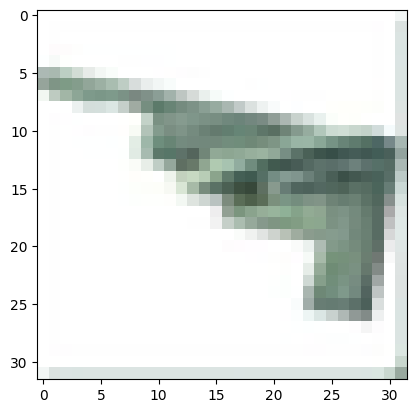

In [ ]:
i = 12345
plt.imshow(x_train[i])
print(y_train[i])

# DATA PREPARATION

In [ ]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

In [ ]:
number_cat = 10

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
x_train = x_train/255
x_test = x_test/255


In [ ]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
Input_shape = x_train.shape[1:]

#TRAIN MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu', input_shape = Input_shape))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))

model.add(Dense(units= 10, activation = 'softmax'))



In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.8929 - accuracy: 0.6864
Epoch 2/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.8141 - accuracy: 0.7139
Epoch 3/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.7548 - accuracy: 0.7359
Epoch 4/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.7021 - accuracy: 0.7528
Epoch 5/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.6521 - accuracy: 0.7694
Epoch 6/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.6110 - accuracy: 0.7842
Epoch 7/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.5643 - accuracy: 0.8002
Epoch 8/10
1563/1563 [==============================] - 142s 91ms/step - loss: 0.5359 - accuracy: 0.8110
Epoch 9/10
1563/1563 [==============================] - 141s 90ms/step - loss: 0.5083 - accuracy: 0.8208
Epoch 10/10
1563/1563 [==============================] 

#EVALUATE THE MODEL

In [ ]:
evaluation = model.evaluate(x_test, y_test)


313/313 [==============================] - 7s 23ms/step - loss: 0.8460 - accuracy: 0.7287


In [ ]:
print('Test Accuracy: {}'.format(evaluation[1]))

Test Accuracy: 0.7286999821662903
